In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
%matplotlib inline

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

In [10]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize = (8,10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

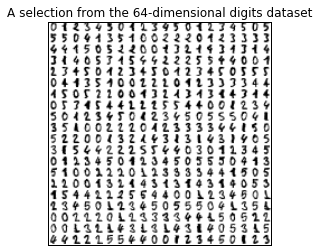

In [6]:
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

Computing t-SNE embedding


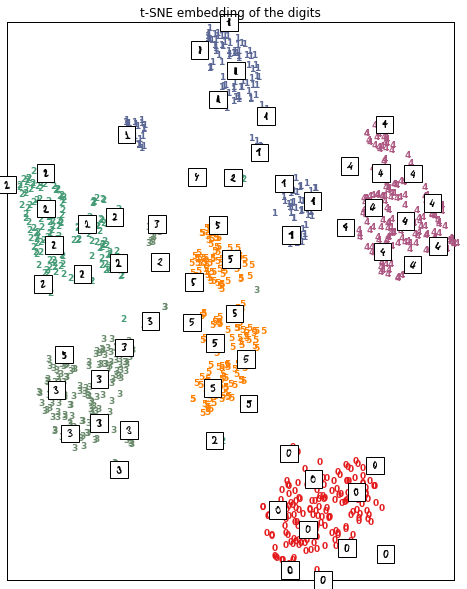

In [11]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits")

plt.show()

In [13]:
import pandas as pd
primary_results = pd.read_csv( 'data/primary_results.csv' )
county_facts = pd.read_csv( 'data/county_facts.csv' )
county_facts_dict = pd.read_csv( 'data/county_facts_dictionary.csv' )
dict_county_facts = {k: v for k, v in zip(county_facts_dict['column_name'].values, county_facts_dict['description'].values)}

In [14]:
trump_results = primary_results[ primary_results[ 'candidate' ] == 'Donald Trump' ]
df_all =trump_results.merge(county_facts, on=['fips'])

In [22]:
df_work = df_all[['EDU635213', 'EDU685213','MAN450207', 'RHI125214', 'RHI725214']]
#high_school, bachelor, manufacturing shippments, percentage of whites, hispanic or latino
data = df_work.values
names = df_all.state.values

NameError: name 'names' is not defined

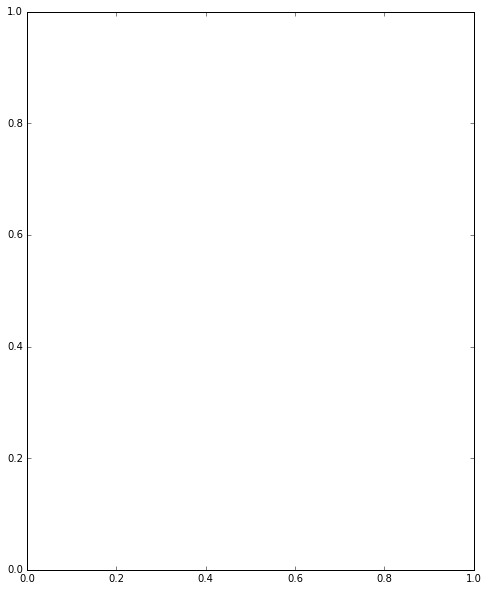

In [21]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X = tsne.fit_transform(data)
x_min, x_max = np.min(X, 0), np.max(X, 0)
X = (X - x_min) / (x_max - x_min)




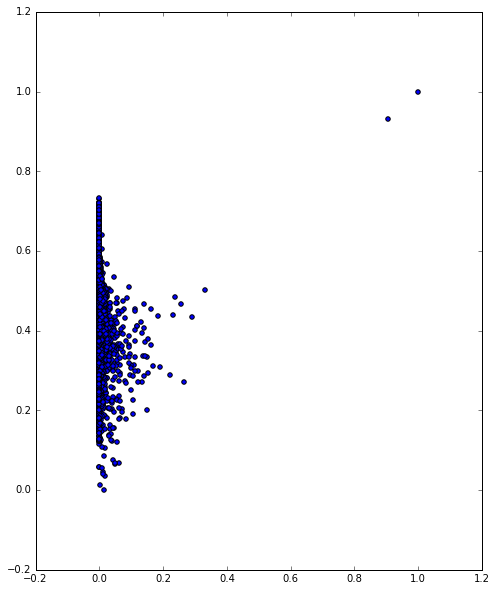

In [24]:
plt.figure(figsize = (8,10))
ax = plt.subplot(111)
plt.scatter(X[:, 0], X[:, 1])